# MNIST Data Classification

In [2]:
# Common imports
import numpy as np
import os

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [13]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
X, y = mnist["data"], mnist["target"]
X.shape # 28 x 28 pixel images build 784 features

(70000, 784)

In [43]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# EXTRA
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<class 'numpy.ndarray'>
(784,)


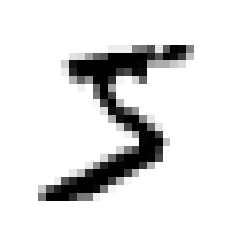

The lable says it´s a : 5 !
<class 'numpy.ndarray'>
(784,)


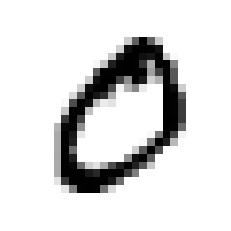

The lable says it´s a : 0 !
<class 'numpy.ndarray'>
(784,)


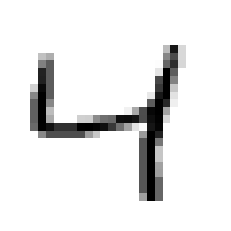

The lable says it´s a : 4 !


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

for i in range(3):
    some_digit = X[i]
    print(type(some_digit))
    print(some_digit.shape)
    some_digit_image= some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()
    print("The lable says it´s a :", y[i], "!")

In [5]:
# y is a string, for the ML algorithm we need it a an int
import numpy as np
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

## Split train and test

In [46]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train.shape

(60000,)

## One Classifier detector

In [7]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [8]:
from sklearn.linear_model import SGDClassifier
# Stochastic Gradient Descent (SGD)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([X[0]])

array([ True])

## Crossvalidation (full way of crsoo_val_score())

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[train_index]
    y_test_fold = y_train_5[train_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\marlo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.951675
0.96725
0.965325


In [10]:
# Cross val Score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring ="accuracy")

array([0.95035, 0.96035, 0.9604 ])

A Model that would predict all numbers to be not 5´s would score ruffly .90 here.
Since this is hardly useful another method will be introduced.

## Confusion Matrix

In [11]:
# Predict using cross val predictions
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=4)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53263,  1316],
       [ 1041,  4380]], dtype=int64)

In [13]:
# non 5´s: True Negatives  |  False Positives
# all 5´s: False Negatives |  True Positives

# Positive or Negative is the Guess

In [14]:
# Perfect example
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall score

In [15]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score:", precision_score(y_train_5, y_train_pred)) # == 4380 / (4380 + 1316)
print("Recall Score:", recall_score(y_train_5, y_train_pred))       # == 4380 / (4380 + 1041)

Precision Score: 0.7689606741573034
Recall Score: 0.8079690094078583


In [16]:
# Precision: When it claims a picture represents a 5, precision is 77%
# Recall: The percent of 5´s it actually detects is: 81% 

### Creating the harmonic mean to have one Metric

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7879823693442477

### Visualizing the Threshold of Precision and Recall

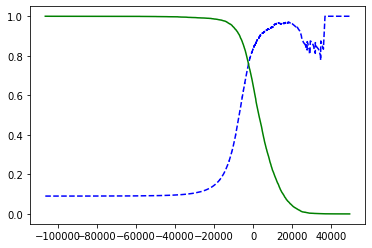

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method = "decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label = "Precision")
    plt.plot(threshold, recalls[:-1], "g-", label= "Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### To actively chose a precision threshold

In [19]:
threshold_90_precision = thresholds[np.argmax(precisions >= .90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

print("Precision Score:", precision_score(y_train_5, y_train_pred_90)) 
print("Recall Score:", recall_score(y_train_5, y_train_pred_90)) 

Precision Score: 0.9000345901072293
Recall Score: 0.4799852425751706


# Performance Measures

## The ROC Curve (receiver operating characteristic)

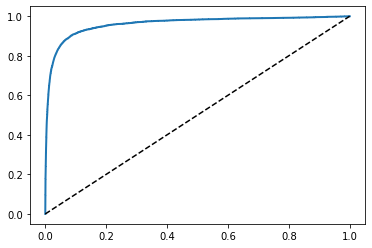

In [24]:
# Similar to Precision/Recall curve
# True positive rate (TPR = Recall)/False positive rate (FPR = 1- True negative rate)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    plt.plot([0,1],[0,1],'k--') #Dashed diagonal
    
plot_roc_curve(fpr, tpr)
plt.show()

In [26]:
# Area under the curve (AUC)
# Goal: ROC AUC == 1
# Randomness: ROC AUC == 0.5
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9604938554008616

### Tipp:
Use PR curve whenever 
1. you care more about the flase positives than about the flase negatives (Precision)
2. the positive class is rare (little 5´s given)
Otherwise use the ROC curve

### Comparisson RandomForestClassifier and SDGClassifier

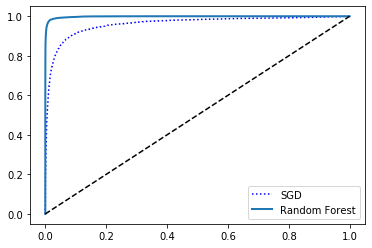

In [28]:
# RandomForestClassifier returns a probability matrix given the predict_proba() function
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# roc_curve() expects lables and scores
# class probabilities also work
# Here positive class´s probability is given as score
y_scores_forest = y_probas_forest[:,1] # score = probability of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

### Review:
The RandomForestClassifier is superior to the SGDClassifier, because its ROC curve is much closer to the top-left corner, and it has a greater AUC

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [47]:
print("Continous:", y_scores_forest)
print("Binary:", y_train_5)

Continous: [0.89 0.01 0.04 ... 0.98 0.08 0.06]
Binary: [ True False False ...  True False False]


In [43]:
# Prevent binary and continous variables -->
y_scores_forest_binary = y_scores_forest>=0.5

#print(y_scores_forest_binary)
print("Precision Score:", precision_score(y_train_5, y_scores_forest_binary))
print("Recall Score:", recall_score(y_train_5, y_scores_forest_binary))

Precision Score: 0.9897468089558485
Recall Score: 0.8725327430363402


# Multiclassification

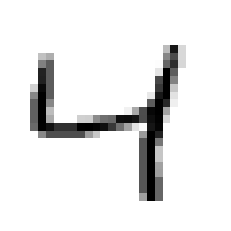

In [62]:
# Logistic Regression classifier
# Random Forest classifier
# naive Bayes classifier

# Binary classifiers work on a one-versus-the-rest basis (OvR)
# --> 10 Trained classifiers to which each image is given and the probability assessed

# One-versus-One (OvO) gives the probability for every pair e. g. 0´s and 1´s
# --> 45 pairs in MNIST
# Small training set
some_digit_image= some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [50]:
# Support Vector Machine (SVM)
# sklearn automatically uses OvO approach

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #not focusing on 5´s anymore
svm_clf.predict([some_digit])

array([4], dtype=uint8)

## OvO

In [51]:
some_digits_scores = svm_clf.decision_function([some_digit])
some_digits_scores

array([[ 0.71537935, -0.29662415,  5.21971626,  6.21824425,  9.30389385,
         3.80284658,  1.79830476,  7.24440738,  2.74262663,  8.25740666]])

In [52]:
np.argmax(some_digits_scores)

4

In [54]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [56]:
svm_clf.classes_[4] # In this case this matches the class 5
# conventionally this does not apply

4

## OvR

In [57]:

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([4], dtype=uint8)

In [58]:
len(ovr_clf.estimators_)

10

In [59]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [67]:
print(sgd_clf.decision_function([some_digit]))
print("The fifth entry shows the highes value (digit 4), only the last value comes close (digit 9)")

[[-34143.40703505 -21942.13780869  -4018.29275037  -2239.19313075
      43.09419826 -15058.88052383 -33653.31059893  -8277.80610963
   -7460.52016321 -14180.15338984]]
The fifth entry shows the highes value (digit 4), only the last value comes close (digit 9)


In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float))
print("Scaled Cross validation scores:", cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring="accuracy"))

Scaled Cross validation scores: [0.8983 0.891  0.9018]


###### Random Guessing would lead of a score to around 10%m hence up to 90% is a very advanced algorithm

### For further steps view ML Checklist in Appendix

#### 1. Explore data
#### 2. Build Pipeline
#### 3. Try multiple models
#### 4. Automate
#### 5. Types of errors

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

##### Rows represent actual classes, while columns represent predicted classes

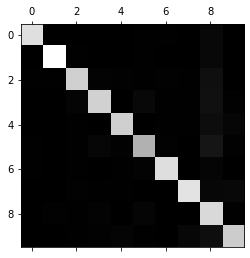

In [68]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

###### The Matrix looks pretty good since the most images on the main diagonal are bright
###### Still, the 5th are darkes which is becuase the algorithm is bad at classifying 5th and there are less 5th in the data set

## Filtering for errors

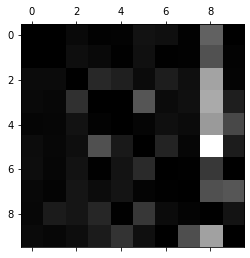

In [69]:
# Dividing each class by then umber of instances inside to get relative values
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

# Fill the Diagonal with 0´s and filter for other noise ocurred
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

###### 1. The bright column of 8 tells you that many digits get miss classified as a 8
###### 2. The row for 8 shows that 8s get properly classified as 8s most of the time
###### 3. 3s and 5s get confused often in both directions

### Theory

In [71]:
# SDG Classifier is a linear model
# All it does is assign a weight per class to each pixel in the image
# When it sees a new image it jsut sums up the weighted picel intensities to get a score for each class.
# Rotating the images and centering them might lead to an improved over all score
# For instance 3s and 5s differ only by one simply line connecting the top line to the body of the number
# --> This leads to confusion

In [ ]:
https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb

# Multilabel Classification

#### Add one input to multiple categories
###### Facial recoginition in an image with many people 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>= 7)
y_train_odd = (y_train % 2 == 1)
y_train_is_four = (y_train == 4)
y_mutlilabel = np.c_[y_train_large, y_train_odd, y_train_is_four]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_mutlilabel)
knn_clf.predict([some_digit])

array([[False, False,  True]])

### This can be weighted according to the frequency one output occurs
### Currently all outputs are weighted equally when comparing with F1

# Multioutput classification

In [77]:
# Input: noisy image
# Output: Clean image
# Array of pixel intensities
# One label per pixel and each label can have multiple values (range from 0 to 255)
# --> Lines between regression and classification blur (Predicting pixel intensity)

In [78]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

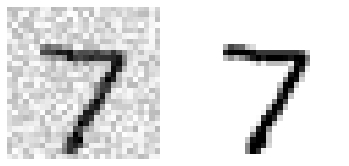

In [93]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

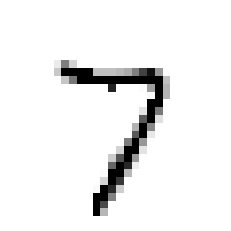

In [94]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)